# Итоговый проект

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats as sts
import pandas_profiling
from sklearn import preprocessing
from scipy.stats import pearsonr, spearmanr
from scipy.stats import t
from scipy import stats

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

### **1.Загружаем файл hr.csv.**

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


- Так как задача понять почему люди увольняются из компании разделим данные на уволившихся и работающих.
- так же уберем данные об уволенных сотрудников по причине несчастного случая (так как спросить не у кого что подразумевается под несчастным случаем я буду понимать что это смерть)

In [4]:
df_2 = df[(df['left'] == 1) & (df['Work_accident'] == 0)]
df_2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3402 non-null   float64
 1   last_evaluation        3402 non-null   float64
 2   number_project         3402 non-null   int64  
 3   average_montly_hours   3402 non-null   int64  
 4   time_spend_company     3402 non-null   int64  
 5   Work_accident          3402 non-null   int64  
 6   left                   3402 non-null   int64  
 7   promotion_last_5years  3402 non-null   int64  
 8   sales                  3402 non-null   object 
 9   salary                 3402 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 292.4+ KB


Проверим датасет на пропуски (пустые ячейки)

In [6]:
df_2.isnull().any()  

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

Проведем разведочный анализ данных. Посмотрим в каких отделах и проектах наиболее низкий уровень удовлетворенности.

In [7]:
depatments_satisfaction_level = df_2.pivot_table(
                        index='sales', 
                        columns='number_project', 
                        values='satisfaction_level', 
                        aggfunc='mean')
depatments_satisfaction_level

number_project,2,3,4,5,6,7
sales,,,,,,
IT,0.411339,0.385000,0.765500,0.699200,0.148000,0.102500
RandD,0.424545,0.120000,0.739286,0.664643,0.101667,0.102000
accounting,0.406207,0.740000,0.681111,0.741500,0.128409,0.128000
hr,0.412059,0.757143,0.728437,0.722381,0.101212,0.101538
management,0.410312,0.420000,0.809167,0.802000,0.119412,0.146923
marketing,0.409010,0.656667,0.777619,0.817308,0.118889,0.100000
product_mng,0.412927,NaN,0.825263,0.746735,0.125652,0.098750
sales,0.413111,0.623750,0.771009,0.753801,0.125290,0.107313
support,0.414478,0.538750,0.802128,0.757426,0.149333,0.108000


В 6ом и 7ом проектах сотрудники меньше всего удовлетваренны работой. Возможно трудятся больше остальных? Проверим.

In [8]:
depatments_average_montly_hours = df.pivot_table(
                        index='sales', 
                        columns='number_project', 
                        values='average_montly_hours', 
                        aggfunc='mean')
depatments_average_montly_hours

number_project,2,3,4,5,6,7
sales,,,,,,
IT,159.835165,196.296830,204.498559,216.932203,241.273684,291.800000
RandD,158.356322,193.550607,205.764444,216.993865,218.346154,263.461538
accounting,158.753968,197.462312,204.067873,210.121429,249.075758,269.266667
hr,152.021429,198.486111,207.418919,207.414894,246.611111,293.153846
management,171.202532,202.070175,203.507246,203.042373,218.190476,266.076923
marketing,155.272727,200.380567,205.593625,211.121429,242.196078,276.933333
product_mng,164.758389,199.668085,200.854962,211.207101,226.140845,282.750000
sales,163.536960,196.842202,206.236134,211.676821,237.573209,275.537313
support,156.805714,197.102349,205.876923,213.623557,239.695402,273.423077


В 6ом и 7ом проектах и в правду трудятся больше остальных. Любопытно, но судя по всему 7 проект сильно завязан на IT.

Посмотрим долю уволившихся в разрезе проектов.

In [9]:
share_of_left = (df_2.groupby('number_project')[('left')].count()) / (df.groupby('number_project')[('left')].count()) * 100

In [10]:
share_of_left

number_project
2    62.562814
3     1.750925
4     8.751432
5    21.115538
6    52.810903
7    98.437500
Name: left, dtype: float64

In [54]:
project_salary = df_2.pivot_table(
                        index='number_project', 
                        columns='salary', 
                        values='left', 
                        aggfunc='count')
project_salary['share_salary'] = project_salary['low'] / (project_salary['medium'] + project_salary['low'] + project_salary['high']) * 100
project_salary

salary,high,low,medium,share_salary
number_project,,,,
2,46,922,526,61.713521
3,3,36,32,50.704225
4,2,235,145,61.518325
5,15,364,204,62.435678
6,13,377,230,60.806452
7,3,143,106,56.746032


- Проведя разведочный анализ можно предположить, что люди покидают компанию от большого обьема работы (6 и 7 проекты).
- Низкая зарплата не сильно варируется в проектах

### **2. Рассчитаем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [11]:
df_2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.0,3402.0,3402.000000
mean,0.439753,0.718195,3.858907,207.542622,3.875367,0.0,1.0,0.004409
std,0.263481,0.197709,1.823615,61.324229,0.978624,0.0,0.0,0.066265
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.0,1.0,0.000000
25%,0.120000,0.520000,2.000000,146.000000,3.000000,0.0,1.0,0.000000
50%,0.410000,0.785000,4.000000,224.500000,4.000000,0.0,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.0,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,0.0,1.0,1.000000


In [12]:
df_2.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,1.0,2,135,3,0,1,0,sales,low


### **3.Рассчитаем и визуализируем корреляционную матрицу для переменных.**

In [13]:
data_matrix = df_2[['satisfaction_level','last_evaluation', 'number_project', 'time_spend_company', 'promotion_last_5years']]

In [14]:
matrix_corr = np.round(data_matrix.corr(), decimals=2)
matrix_corr

,satisfaction_level,last_evaluation,number_project,time_spend_company,promotion_last_5years
satisfaction_level,1.00,0.18,-0.23,0.45,-0.00
last_evaluation,0.18,1.00,0.80,0.78,-0.05
number_project,-0.23,0.80,1.00,0.60,-0.02
time_spend_company,0.45,0.78,0.60,1.00,-0.05
promotion_last_5years,-0.00,-0.05,-0.02,-0.05,1.00


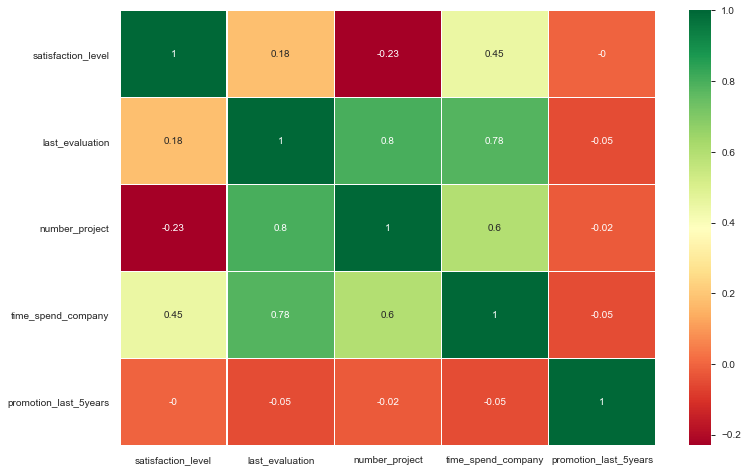

In [15]:
heatmap = sns.heatmap(matrix_corr, annot=True, cmap='RdYlGn', linewidths=0.2)

Любопытно. Люди, работающие дольше получают выше оценки, что вполне себе логично.

### **4.Визуализируем несколько взаимосвязей между переменными.**

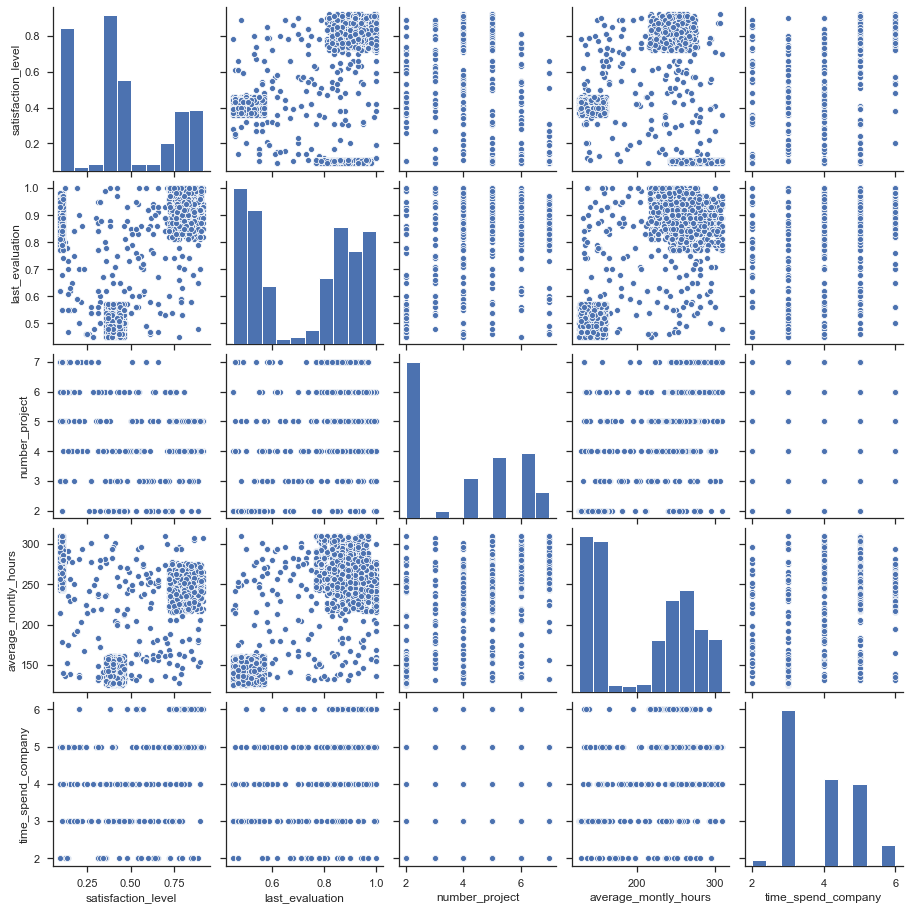

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_2, vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], kind="scatter")

### **5.С использованием t-test статистики проверим взаимосвязи между несколькими переменными.**

Продолжаем "капать" дальше. Проверим пару гипотез.

1. H0 - у уволенных сотрудников из IT отдела, участвующих в проекте 7 уровень удовлетворенности не отличается от сотрудников, участвующих в проекте 4.

In [34]:
project_7 = df_2[(df_2['number_project'] == 7) & (df_2['sales'] == 'IT')]['satisfaction_level']
project_4 = df_2[(df_2['number_project'] == 4) & (df_2['sales'] == 'IT')]['satisfaction_level']

In [35]:
len(project_7), len(project_4)

(20, 20)

In [36]:
sts.shapiro(project_7)

ShapiroResult(statistic=0.7795071601867676, pvalue=0.000434233748819679)

In [37]:
sts.shapiro(project_4)

ShapiroResult(statistic=0.8372632265090942, pvalue=0.0032850829884409904)

Не сморя на тест Шапиро сделаем допущение, что даные распределены нормально.

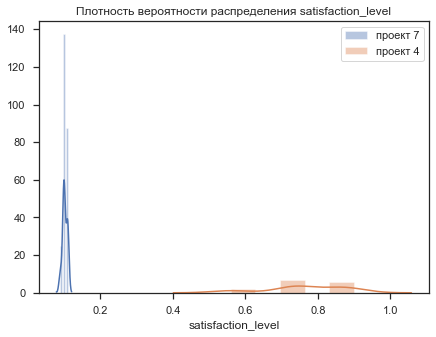

In [47]:
plt.figure(figsize=(7, 5))
sns.distplot(project_7, 5)
sns.distplot(project_4, 5)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['проект 7', 'проект 4'])
plt.show()

In [43]:
stats.ttest_ind(project_4, project_7)

Ttest_indResult(statistic=27.206232945621434, pvalue=1.6028156187342904e-26)

In [44]:
statistics.mean(project_7)

0.10250000000000001

In [45]:
statistics.mean(project_4)

0.7655

pvalue < 0.05. Не достаточно оснований что бы принять нулевую гипотезу. Пока наши догадки подтверждаются. В 7м проекте увольняются люди.

2. H0 - у уволенных сотрудников из IT отдела, участвующих в проекте 7 объем рабочих часов не отличался от объема часов в проекте 4.

In [55]:
project_7_hours = df_2[(df_2['number_project'] == 7) & (df_2['sales'] == 'IT')]['average_montly_hours']
project_4_hours = df_2[(df_2['number_project'] == 4) & (df_2['sales'] == 'IT')]['average_montly_hours']

In [56]:
len(project_7_hours), len(project_4_hours)

(20, 20)

In [57]:
sts.shapiro(project_7_hours)

ShapiroResult(statistic=0.8637681007385254, pvalue=0.009147199802100658)

In [58]:
sts.shapiro(project_4_hours)

ShapiroResult(statistic=0.8697569370269775, pvalue=0.011634052731096745)

Не сморя на тест Шапиро сделаем допущение, что даные распределены нормально.

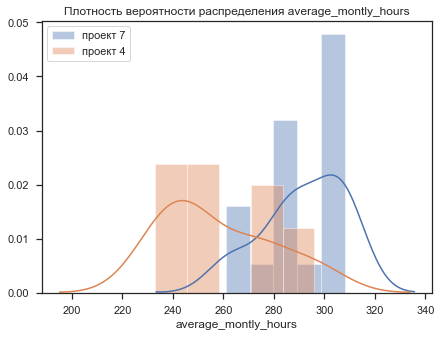

In [59]:
plt.figure(figsize=(7, 5))
sns.distplot(project_7_hours, 5)
sns.distplot(project_4_hours, 5)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['проект 7', 'проект 4'])
plt.show()

In [62]:
stats.ttest_ind(project_7_hours, project_4_hours)

Ttest_indResult(statistic=5.639453392585067, pvalue=1.7781149795635145e-06)

pvalue < 0.05. Не достаточно оснований что бы принять нулевую гипотезу. Все таки уровень удовлетворенности сильно зависти и от проекта и от объема рабочих часво.

### **6.Рассчитаем сколько работников работает в каждом департаменте.**

In [26]:
department_employee = df['sales'].value_counts().reset_index()
department_employee.columns = ['department', 'count_employee']
department_employee

,department,count_employee
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


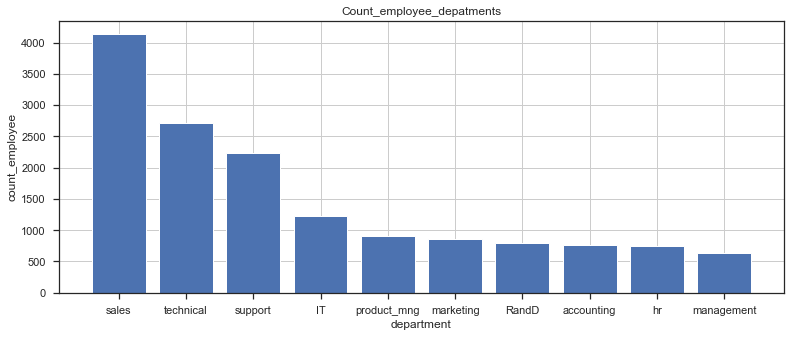

In [27]:
plt.figure(figsize=(13, 5))
plt.bar(department_employee['department'], department_employee['count_employee'], color='b')
plt.xlabel('department')
plt.ylabel('count_employee')
plt.title('Count_employee_depatments')
plt.grid(True)

### **7.Получим распределение сотрудников по зарплатам.**

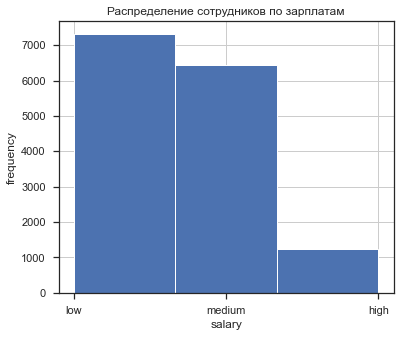

In [28]:
plt.figure(figsize=(6, 5))
plt.hist(df['salary'], 3, color='b', edgecolor='white')
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Распределение сотрудников по зарплатам')
plt.grid(True)

### **8.Получим распределение сотрудников по зарплатам совместно с департаментами.**

In [29]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
depatments_salary = df.pivot_table(
                        index='sales', 
                        columns='salary', 
                        values='left', 
                        aggfunc='count')
depatments_salary

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


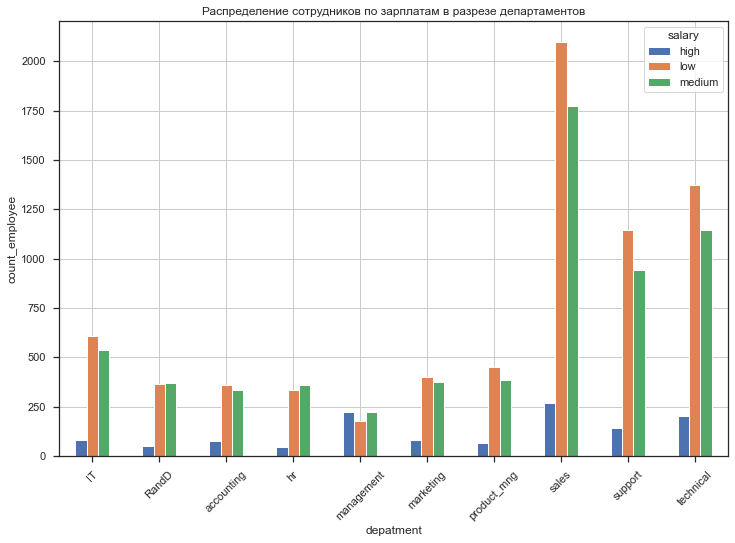

In [31]:
depatments_salary.plot(kind='bar', rot=45, stacked=False)
plt.xlabel('depatment')
plt.ylabel('count_employee')
plt.title('Распределение сотрудников по зарплатам в разрезе департаментов')
plt.grid(True)

### **9.Узнаем сколько сотрудников покинули компанию.**

In [32]:
#Сотрудники покинувшие компанию в разрезе отделов
employee_left = df[df['left'] == 1]
employee_left.groupby('sales')[('left')].count()

sales
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

In [33]:
#Общее колличество сотрудников покинувших компанию
print(f'Количество сотрудников покинувших компанию составило {employee_left["left"].sum()} человек.')

Количество сотрудников покинувших компанию составило 3571 человек.


### **10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

Н0 - у айтишников уровень удовлетворенности во всех проектах не отличается.

In [63]:
project_2 = df_2[(df_2['number_project'] == 2) & (df_2['sales'] == 'IT')]['satisfaction_level']
project_3 = df_2[(df_2['number_project'] == 3) & (df_2['sales'] == 'IT')]['satisfaction_level']
project_4_1 = df_2[(df_2['number_project'] == 4) & (df_2['sales'] == 'IT')]['satisfaction_level']
project_5 = df_2[(df_2['number_project'] == 5) & (df_2['sales'] == 'IT')]['satisfaction_level']
project_6 = df_2[(df_2['number_project'] == 6) & (df_2['sales'] == 'IT')]['satisfaction_level']
project_7_1 = df_2[(df_2['number_project'] == 7) & (df_2['sales'] == 'IT')]['satisfaction_level']
stats.f_oneway(project_2, project_3, project_4_1, project_5, project_6, project_7_1)

F_onewayResult(statistic=103.86141406635446, pvalue=1.0017453445572455e-59)

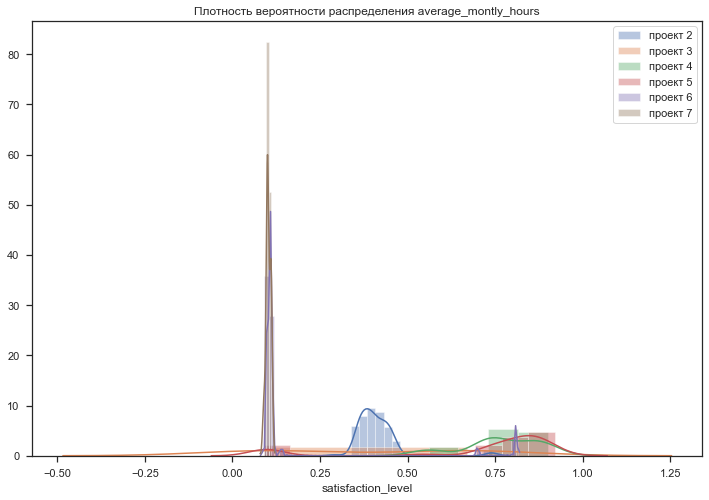

In [71]:

sns.distplot(project_2)
sns.distplot(project_3)
sns.distplot(project_4_1)
sns.distplot(project_5)
sns.distplot(project_6)
sns.distplot(project_7_1)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['проект 2', 'проект 3', 'проект 4','проект 5', 'проект 6', 'проект 7'])
plt.show()

Нет оснований принять нулевую гипотезу.

По итогам проведенного анализа данных были выявленные некоторые закономерности между проектами и уровнем удвлетворенности сотрудников в нем. Больше всго доля неудовлетворенных сотрудников в проекте 7. Кроме того текучка там крайне высокая, это обусловлено большим объемом рабочтих часов. В целях уточнения деталей необходимо провести опрос сотрудников данного проекта. Таким образом, Большой обьем часов работы, проект номер 7 может вносить значительный вклад в колличество уволеных сотрудников. Для поиска других причин необходимо проконсультироватся с эйчарщиками на предмет формирования датасета (пологаю это сбор из данных по отделам и по проетам, на это намекает бимодальность и мультимодальность распределения данных, особенно это касается удовлетворенности.